Since height is a function of two variables, simplest approach is to use bilinear interpolation, which is an expension of linear interpolation. Whatever our map points are, we can always normalize it to be centered, with all four corners have zero height.

In [3]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt

In [26]:
x = [0, 1, 0, 1]
y = [0, 0, 1, 1]
z = [0, 0, 0, 0]
poly = sp.interpolate.interp2d(x, y, z)

In [94]:
x = [0, 1, 1, 0]
y = [0, 0, 1, 1]
z = [0, 0, 1, 0]
poly2 = sp.interpolate.interp2d(x, y, z)

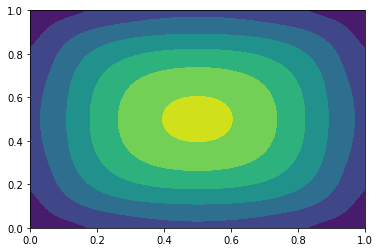

In [137]:
x = [0, 1, 0, 1, .5]
y = [0, 0, 1, 1, .5]
z = [0, 0, 0, 0, .5]

# target grid to interpolate to
xi = yi = np.arange(0,1.01,0.01)
xi,yi = np.meshgrid(xi,yi)
zi = sp.interpolate.griddata((x,y),z,(xi,yi),method='cubic')
plt.contourf(xi, yi, zi)

In [142]:
coords = np.array([x, y])

In [146]:
coords.shape[1]

5

In [105]:
xx = np.linspace(0, 2, 50)
yy = np.linspace(0, 2, 50)

In [106]:
poly(xx, yy)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
pred = poly3(xx, yy)

array([[4.        , 3.83673469, 3.67346939, ..., 0.        , 0.        ,
        0.        ],
       [3.83673469, 3.68013328, 3.52353186, ..., 0.        , 0.        ,
        0.        ],
       [3.67346939, 3.52353186, 3.37359434, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

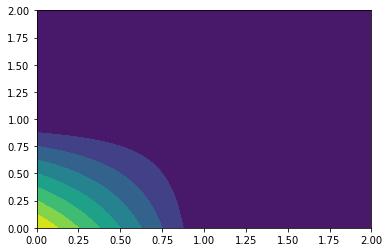

In [108]:
plt.contourf(xx, yy, pred)

**Radial basis function** is a function whole value depends only on the distance from the origin.
$$\phi(x, c) = \phi(||x - c||)$$
Distance used is Euclidean: $d(x_1, y_1, x_2, y_2)=(x_1 - x_2)^2 + (y_1 - y_2)^2$

This particular function was empirically derived by @mk:
$$r = ||x-c||$$
$$\phi(c, r) = c - c \frac{8r^3}{8r^3 + 1c^3}$$

`1` near $c^3$ is a hyperparameter: increase will inflate the "nipple" (thanks, Nika) and vice versa.

In [5]:
f_mk = lambda l, h: h - h * (8 * l ** 3 ) / (8 * l ** 3 + 1 * h ** 3)
dist = lambda x1, y1, x2, y2: (x1 - x2) ** 2 + (y1 - y2) ** 2

In [6]:
def interpol(points, values, xmin=0, xmax=1, ymin=0, ymax=1):
    x = np.linspace(xmin, xmax)
    y = np.linspace(ymin, ymax)
    xx, yy = np.meshgrid(x, y)
    z = np.zeros_like(xx)
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            for (xp, yp), val in zip(points, values):
                d = dist(xx[i, j], yy[i, j], xp, yp)
                m = f_mk(d, val)
                mean = (m + z[i, j]) / 2
                z[i, j] = mean if mean > z[i, j] else z[i, j]
    return xx, yy, z


In [7]:
# points = np.array([[0.5, 0.5],
#                    [1, 1],
#                    [1, 0.5]])
# values = np.array([.5, .3, .5])
points = np.array([[10, 10],
                   [5, 5],
                   [5, 15],
                   [15, 5],
                   [15, 15]])
values = np.array([2, 5, 5, 5, 5])
xx, yy, zz = interpol(points, values, 0, 20, 0, 20)

Problem with radial interpolation is clearly evident below. Points are taken from 4th example. Instead of connecting peripheral points, we have solemn "mountains".

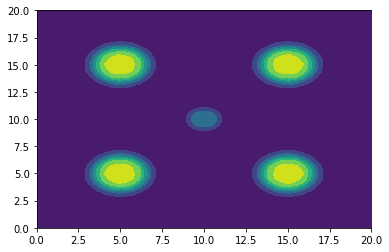

In [8]:
plt.contourf(xx, yy, zz)

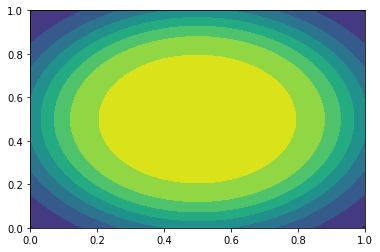

In [11]:
# 1st example
points = np.array([[0.5, 0.5]])
values = np.array([.5, .3, .3])
xx, yy, zz = interpol(points, values, 0, 1, 0, 1)
plt.contourf(xx, yy, zz)